In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from textblob import TextBlob as tb

In [2]:
df = pd.read_csv("DataSet/final_dataset.csv")

In [3]:
df.columns

Index(['original_text', 'preprocessed_text', 'length_text', 'not_tag_text',
       'airline', 'airline_sentiment', 'negative_reason'],
      dtype='object')

# 1 - Weak labeling using VADER

In [4]:
def get_compound(data, text_attr):
    sentences = data[text_attr].fillna("")
    text = list(sentences)
    
    analyzer = SentimentIntensityAnalyzer()
    
    compound = []
    for sentence in text:
        vs = analyzer.polarity_scores(sentence)
        compound.append(vs["compound"])
    return compound

In [5]:
def apply_threashold(compound, threashold):
    vader_label=[]
    for i in compound:
        if i >= threashold :
            vader_label.append("positive")
        elif i <= - threashold : 
            vader_label.append("negative")
        else : 
            vader_label.append("neutral")
    return vader_label

In [24]:
def evaluate(data, compound, threashold):
    encoder = LabelEncoder()
    real = encoder.fit_transform(data["airline_sentiment"])
    predict = encoder.fit_transform(apply_threashold(compound, threashold))
    print(f"accuracy score: \n {accuracy_score(real,predict)}")
    
    print(f"confusion_matrix: \n {confusion_matrix(real,predict)}")
    print(f"classification_report: \n {classification_report(real,predict, digits=3)}")

### 1) Vader on preprocessed_text

In [7]:
compound = get_compound(df, "preprocessed_text")

In [8]:
new_df = pd.DataFrame({"vader_preproc": compound})

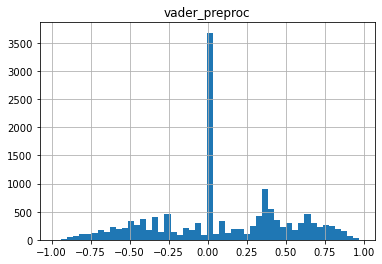

In [9]:
new_df.hist("vader_preproc", bins = 50)
plt.show()

In [25]:
evaluate(df, compound, 0.05)

accuracy score: 
 0.5426229508196722
confusion_matrix: 
 [[4560 1906 2712]
 [ 431 1325 1343]
 [  89  215 2059]]
classification_report: 
               precision    recall  f1-score   support

           0      0.898     0.497     0.640      9178
           1      0.385     0.428     0.405      3099
           2      0.337     0.871     0.486      2363

    accuracy                          0.543     14640
   macro avg      0.540     0.599     0.510     14640
weighted avg      0.698     0.543     0.565     14640



In [11]:
evaluate(df, compound, 0.10)

accuracy score: 
 0.4918032786885246
confusion_matrix: 
 [[3721 2685 2772]
 [ 361 1472 1266]
 [  78  278 2007]]
classification_report: 
               precision    recall  f1-score   support

           0      0.894     0.405     0.558      9178
           1      0.332     0.475     0.391      3099
           2      0.332     0.849     0.477      2363

    accuracy                          0.492     14640
   macro avg      0.519     0.577     0.475     14640
weighted avg      0.685     0.492     0.510     14640



In [15]:
evaluate(df, compound, 0.15)

accuracy score: 
 0.4817622950819672
confusion_matrix: 
 [[3526 3037 2615]
 [ 315 1535 1249]
 [  69  302 1992]]
classification_report: 
               precision    recall  f1-score   support

           0      0.902     0.384     0.539      9178
           1      0.315     0.495     0.385      3099
           2      0.340     0.843     0.485      2363

    accuracy                          0.482     14640
   macro avg      0.519     0.574     0.470     14640
weighted avg      0.687     0.482     0.498     14640



### 2) Vader on original_text

In [17]:
compound = get_compound(df, "original_text")

In [18]:
new_df["vader_original"] = compound

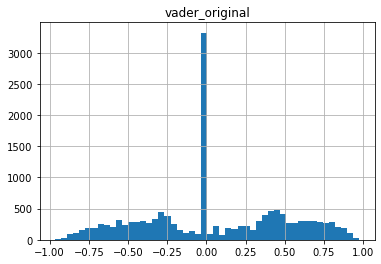

In [19]:
new_df.hist("vader_original", bins = 50)
plt.show()

In [20]:
evaluate(df, compound, 0.05)

accuracy score: 
 0.5426229508196722
confusion_matrix: 
 [[4560 1906 2712]
 [ 431 1325 1343]
 [  89  215 2059]]
classification_report: 
               precision    recall  f1-score   support

           0      0.898     0.497     0.640      9178
           1      0.385     0.428     0.405      3099
           2      0.337     0.871     0.486      2363

    accuracy                          0.543     14640
   macro avg      0.540     0.599     0.510     14640
weighted avg      0.698     0.543     0.565     14640



In [21]:
evaluate(df, compound, 0.10)

accuracy score: 
 0.541188524590164
confusion_matrix: 
 [[4442 2182 2554]
 [ 399 1427 1273]
 [  86  223 2054]]
classification_report: 
               precision    recall  f1-score   support

           0      0.902     0.484     0.630      9178
           1      0.372     0.460     0.412      3099
           2      0.349     0.869     0.498      2363

    accuracy                          0.541     14640
   macro avg      0.541     0.605     0.513     14640
weighted avg      0.700     0.541     0.562     14640



In [45]:
evaluate(df, compound, 0.50)

accuracy score: 
 0.3984289617486339
confusion_matrix: 
 [[1926 6306  946]
 [  84 2502  513]
 [  25  933 1405]]
classification_report: 
               precision    recall  f1-score   support

           0      0.946     0.210     0.344      9178
           1      0.257     0.807     0.390      3099
           2      0.491     0.595     0.538      2363

    accuracy                          0.398     14640
   macro avg      0.565     0.537     0.424     14640
weighted avg      0.727     0.398     0.385     14640



In [46]:
evaluate(df, compound, 0.02)

accuracy score: 
 0.5455601092896175
confusion_matrix: 
 [[4612 1779 2787]
 [ 432 1311 1356]
 [  93  206 2064]]
classification_report: 
               precision    recall  f1-score   support

           0      0.898     0.503     0.644      9178
           1      0.398     0.423     0.410      3099
           2      0.333     0.873     0.482      2363

    accuracy                          0.546     14640
   macro avg      0.543     0.600     0.512     14640
weighted avg      0.701     0.546     0.568     14640



### 3) Vader on preprocessed_text without tag

In [65]:
compound = get_compound(df, "not_tag_text")

In [66]:
new_df["vader_no_tag"]= compound

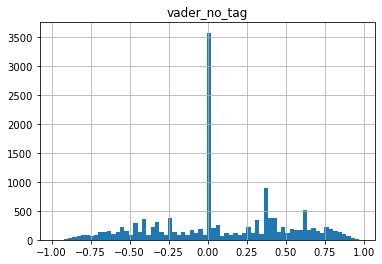

In [67]:
new_df.hist("vader_no_tag", bins = 70)
plt.show()

In [51]:
evaluate(df, compound, 0.05)

accuracy score: 
 0.4969945355191257
confusion_matrix: 
 [[3928 2218 3032]
 [ 424 1324 1351]
 [ 100  239 2024]]
classification_report: 
               precision    recall  f1-score   support

           0      0.882     0.428     0.576      9178
           1      0.350     0.427     0.385      3099
           2      0.316     0.857     0.462      2363

    accuracy                          0.497     14640
   macro avg      0.516     0.571     0.474     14640
weighted avg      0.678     0.497     0.517     14640



In [52]:
evaluate(df, compound, 0.25)

accuracy score: 
 0.466051912568306
confusion_matrix: 
 [[3220 3649 2309]
 [ 274 1641 1184]
 [  56  345 1962]]
classification_report: 
               precision    recall  f1-score   support

           0      0.907     0.351     0.506      9178
           1      0.291     0.530     0.376      3099
           2      0.360     0.830     0.502      2363

    accuracy                          0.466     14640
   macro avg      0.519     0.570     0.461     14640
weighted avg      0.688     0.466     0.478     14640



In [53]:
evaluate(df, compound, 0.50)

accuracy score: 
 0.3556693989071038
confusion_matrix: 
 [[1410 6826  942]
 [  65 2549  485]
 [  17 1098 1248]]
classification_report: 
               precision    recall  f1-score   support

           0      0.945     0.154     0.264      9178
           1      0.243     0.823     0.376      3099
           2      0.467     0.528     0.495      2363

    accuracy                          0.356     14640
   macro avg      0.552     0.501     0.378     14640
weighted avg      0.719     0.356     0.325     14640



In [54]:
evaluate(df, compound, 0.02)

accuracy score: 
 0.5005464480874317
confusion_matrix: 
 [[3998 2059 3121]
 [ 432 1299 1368]
 [ 107  225 2031]]
classification_report: 
               precision    recall  f1-score   support

           0      0.881     0.436     0.583      9178
           1      0.363     0.419     0.389      3099
           2      0.312     0.860     0.457      2363

    accuracy                          0.501     14640
   macro avg      0.518     0.571     0.476     14640
weighted avg      0.679     0.501     0.522     14640



# 2 - Weak labeling using TextBlob

In [26]:
def get_polarity(data, text_attr):
    sentences = data[text_attr].fillna("")
    text = list(sentences)

    compound = []
    for sentence in text:
        vs = tb(sentence).sentiment.polarity
        compound.append(vs)
    return compound

### 1) TextBlob on preprocessed_text

In [27]:
polarity = get_polarity(df, "preprocessed_text")

In [28]:
new_df["textBl_preproc"] = polarity

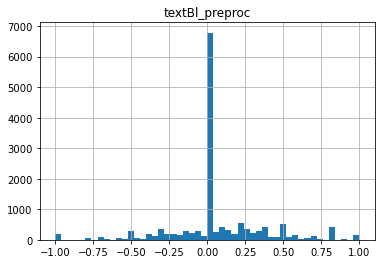

In [29]:
new_df.hist("textBl_preproc", bins = 50)
plt.show()

In [30]:
evaluate(df, polarity, 0.05)
evaluate(df, polarity, 0.10)
evaluate(df, polarity, 0.25)

accuracy score: 
 0.3957650273224044
confusion_matrix: 
 [[2424 4233 2521]
 [ 249 1951  899]
 [ 117  827 1419]]
classification_report: 
               precision    recall  f1-score   support

           0      0.869     0.264     0.405      9178
           1      0.278     0.630     0.386      3099
           2      0.293     0.601     0.394      2363

    accuracy                          0.396     14640
   macro avg      0.480     0.498     0.395     14640
weighted avg      0.651     0.396     0.399     14640

accuracy score: 
 0.3815573770491803
confusion_matrix: 
 [[2156 4700 2322]
 [ 213 2040  846]
 [  96  877 1390]]
classification_report: 
               precision    recall  f1-score   support

           0      0.875     0.235     0.370      9178
           1      0.268     0.658     0.381      3099
           2      0.305     0.588     0.402      2363

    accuracy                          0.382     14640
   macro avg      0.482     0.494     0.384     14640
weighted avg      0

### 2) TextBlob on original_text

In [31]:
polarity = get_polarity(df, "original_text")

In [32]:
new_df["textBl_original"] = polarity

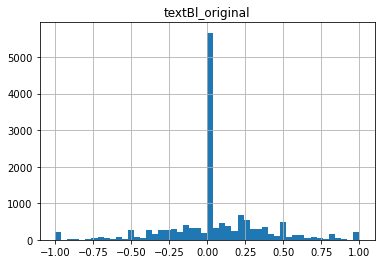

In [33]:
new_df.hist("textBl_original", bins = 50)
plt.show()

In [34]:
evaluate(df, polarity, 0.05)
evaluate(df, polarity, 0.10)
evaluate(df, polarity, 0.25)

accuracy score: 
 0.4527322404371585
confusion_matrix: 
 [[3015 3686 2477]
 [ 300 1820  979]
 [  86  484 1793]]
classification_report: 
               precision    recall  f1-score   support

           0      0.887     0.329     0.479      9178
           1      0.304     0.587     0.400      3099
           2      0.342     0.759     0.471      2363

    accuracy                          0.453     14640
   macro avg      0.511     0.558     0.450     14640
weighted avg      0.675     0.453     0.461     14640

accuracy score: 
 0.4364754098360656
confusion_matrix: 
 [[2708 4255 2215]
 [ 247 1932  920]
 [  64  549 1750]]
classification_report: 
               precision    recall  f1-score   support

           0      0.897     0.295     0.444      9178
           1      0.287     0.623     0.393      3099
           2      0.358     0.741     0.483      2363

    accuracy                          0.436     14640
   macro avg      0.514     0.553     0.440     14640
weighted avg      0

### 3) TextBlob on preprocessed_text without tag

In [82]:
polarity = get_polarity(df, "not_tag_text")

In [83]:
new_df["textB_no_tag"]= polarity

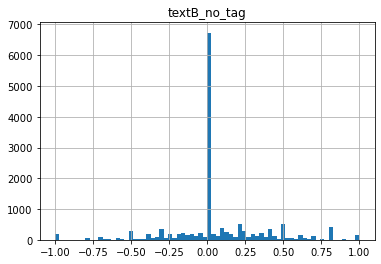

In [84]:
new_df.hist("textB_no_tag", bins = 70)
plt.show()

In [85]:
evaluate(df, polarity, 0.05)
evaluate(df, polarity, 0.02)
evaluate(df, polarity, 0.25)

accuracy score: 
 0.39562841530054643
confusion_matrix: 
 [[2424 4233 2521]
 [ 250 1949  900]
 [ 117  827 1419]]
classification_report: 
               precision    recall  f1-score   support

           0      0.869     0.264     0.405      9178
           1      0.278     0.629     0.386      3099
           2      0.293     0.601     0.394      2363

    accuracy                          0.396     14640
   macro avg      0.480     0.498     0.395     14640
weighted avg      0.651     0.396     0.399     14640

accuracy score: 
 0.4026639344262295
confusion_matrix: 
 [[2547 4022 2609]
 [ 269 1916  914]
 [ 129  802 1432]]
classification_report: 
               precision    recall  f1-score   support

           0      0.865     0.278     0.420      9178
           1      0.284     0.618     0.389      3099
           2      0.289     0.606     0.391      2363

    accuracy                          0.403     14640
   macro avg      0.479     0.501     0.400     14640
weighted avg      